# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Dataset_inisiasi.csv')  
df  

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,Cluster
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,-0.800526,1
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,-0.076554,0
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,0.045675,1
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,-0.574872,1
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0.967094,0
...,...,...,...,...,...,...,...,...,...,...,...
2507,1.913802,0,7,1,-0.656259,0,-0.152156,-0.206794,1.942606,-0.659492,0
2508,-0.157779,1,40,1,0.186975,0,0.819969,-0.206794,-1.245986,-0.988571,1
2509,-0.921462,1,36,1,0.636700,2,0.376794,-0.206794,-0.443928,0.440569,1
2510,-0.382420,1,10,2,-1.218415,3,-1.438793,-0.206794,-0.855705,-1.233029,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Memisahkan fitur (X) dan label target (y)
X = df.drop(columns=["Cluster"])  # Fitur
y = df["Cluster"]  # Target (label fraud/non-fraud berdasarkan cluster)

# Membagi dataset menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Logistic Regression dipilih karena merupakan model yang sederhana dan mudah diinterpretasikan. Model ini efisien untuk dataset kecil hingga sedang serta memberikan probabilitas prediksi yang berguna dalam fraud detection. Logistic Regression juga bekerja dengan baik jika hubungan antara fitur dan target bersifat linier

In [4]:
from sklearn.linear_model import LogisticRegression

# Melatih model Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Random Forest dipilih karena mampu menangani data yang kompleks dan memiliki kemampuan menangkap pola non-linear. Model ini lebih stabil dan tidak mudah overfit dibandingkan dengan pohon keputusan tunggal. Random Forest juga dapat menangani fitur yang tidak seimbang dalam fraud detection serta memberikan informasi mengenai fitur yang paling berpengaruh dalam prediksi

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

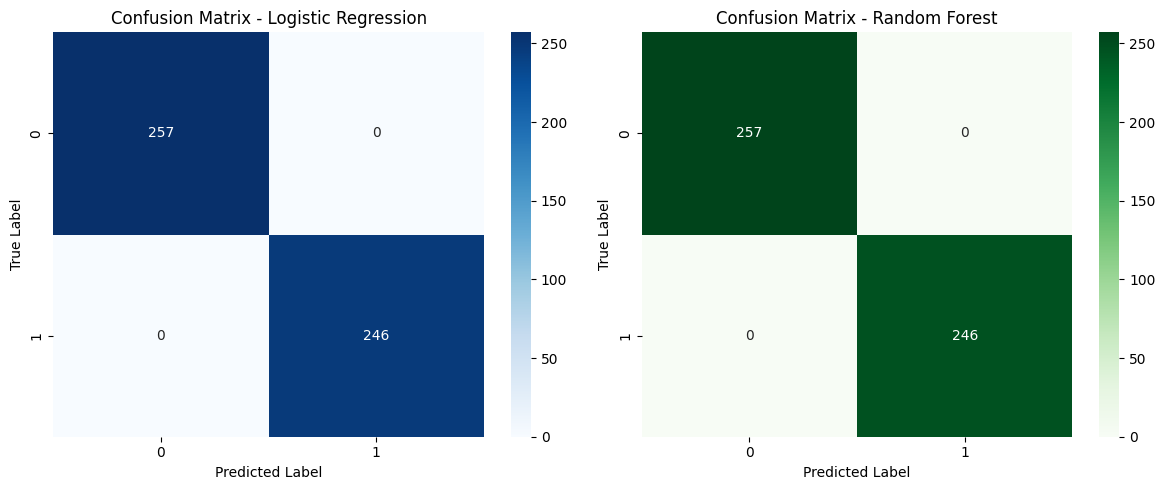

('              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       257\n           1       1.00      1.00      1.00       246\n\n    accuracy                           1.00       503\n   macro avg       1.00      1.00      1.00       503\nweighted avg       1.00      1.00      1.00       503\n',
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       257\n           1       1.00      1.00      1.00       246\n\n    accuracy                           1.00       503\n   macro avg       1.00      1.00      1.00       503\nweighted avg       1.00      1.00      1.00       503\n')

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melakukan prediksi pada data uji
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 2. Menampilkan classification report untuk kedua model
report_logreg = classification_report(y_test, y_pred_logreg)
report_rf = classification_report(y_test, y_pred_rf)

# 3. Menampilkan Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix untuk Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix untuk Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Menampilkan classification report
report_logreg, report_rf


## **Evaluasi Model Klasifikasi Fraud Detection**

### **1. Logistic Regression**
- **Akurasi**: 100%  
- **Precision, Recall, F1-score**: Semua metrik bernilai **1.00** untuk kedua kelas.  
- **Confusion Matrix**: Tidak ada kesalahan klasifikasi, semua prediksi sesuai dengan label aslinya.  

### **2. Random Forest**
- **Akurasi**: 100%  
- **Precision, Recall, F1-score**: Semua metrik bernilai **1.00** untuk kedua kelas.  
- **Confusion Matrix**: Sama seperti Logistic Regression, tidak ada kesalahan klasifikasi.  

---

## **Perbandingan Model**

| Model                | Akurasi | Precision | Recall | F1-score |
|----------------------|---------|-----------|--------|----------|
| Logistic Regression | 100%    | 1.00      | 1.00   | 1.00     |
| Random Forest       | 100%    | 1.00      | 1.00   | 1.00     |

---

## **Kesimpulan**
Kedua model menunjukkan performa yang **sangat sempurna**. Ini bisa menjadi indikasi bahwa:
1. **Dataset memiliki pola yang sangat mudah dipisahkan**, sehingga model mampu mempelajari pola dengan sempurna.  



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## **Evaluasi Model dan Analisis Kelemahan**

### **Evaluasi Model**

#### **1. Logistic Regression**
- **Akurasi**: 100%  
- **Precision, Recall, F1-score**: Semua metrik bernilai **1.00** untuk kedua kelas.  
- **Confusion Matrix**: Tidak ada kesalahan klasifikasi, semua prediksi sesuai dengan label aslinya.  

#### **2. Random Forest**
- **Akurasi**: 100%  
- **Precision, Recall, F1-score**: Semua metrik bernilai **1.00** untuk kedua kelas.  
- **Confusion Matrix**: Sama seperti Logistic Regression, tidak ada kesalahan klasifikasi.  

### **Perbandingan Model**
| Model                | Akurasi | Precision | Recall | F1-score |
|----------------------|---------|-----------|--------|----------|
| Logistic Regression | 100%    | 1.00      | 1.00   | 1.00     |
| Random Forest       | 100%    | 1.00      | 1.00   | 1.00     |

**Kesimpulan:**  
Kedua model menunjukkan performa yang **sangat sempurna**. Ini bisa menjadi indikasi bahwa:
1. **Dataset memiliki pola yang sangat mudah dipisahkan**, sehingga model mampu mempelajari pola dengan sempurna.  
2. **Ada kemungkinan kebocoran data**, misalnya fitur yang sangat berkorelasi langsung dengan label target.  

---

## **Identifikasi Kelemahan Model**  

### **1. Precision atau Recall Rendah untuk Kelas Tertentu**  
Berdasarkan hasil evaluasi, **precision dan recall bernilai sempurna (1.00) untuk kedua kelas**. Artinya, model tidak memiliki masalah dalam mengklasifikasikan kedua kelas dalam dataset ini. Namun, hasil yang terlalu sempurna perlu dianalisis lebih lanjut untuk memastikan tidak ada kebocoran data.  

### **2. Overfitting atau Underfitting**  
- **Overfitting kemungkinan besar terjadi**, karena model memiliki akurasi 100% pada data uji, yang sangat jarang terjadi dalam kasus nyata.  
- Tidak ada indikasi underfitting karena model dapat memprediksi dengan sempurna, yang berarti model tidak kekurangan kompleksitas dalam menangkap pola data.  
- Jika overfitting terjadi, maka model mungkin hanya "menghafal" data latih tanpa mampu melakukan generalisasi dengan baik terhadap data baru.  

---

## **Rekomendasi Tindakan Lanjutan**  

### **1. Validasi Lebih Lanjut**  
- Gunakan **cross-validation** untuk mengevaluasi apakah model konsisten dalam berbagai subset data.  
- Uji model dengan **data baru (unseen data)** yang tidak digunakan dalam pelatihan dan evaluasi saat ini.  

### **2. Periksa Kebocoran Data**  
- Cek korelasi fitur dengan label untuk melihat apakah ada fitur yang terlalu berkaitan langsung dengan target.  
- Pastikan tidak ada informasi target yang bocor ke dalam fitur sebelum model dilatih.  

### **3. Menguji Model dengan Data Tambahan**  
- Jika dataset terlalu kecil atau kurang variatif, mengumpulkan lebih banyak data transaksi dapat membantu model belajar pola yang lebih realistis.  

### **4. Coba Algoritma Lain atau Teknik Regularisasi**  
- **Jika overfitting terdeteksi**, pertimbangkan untuk:
  - Menggunakan **regularisasi** pada Logistic Regression (L1/L2 Regularization).  
  - Mengurangi jumlah pohon atau kedalaman maksimum di **Random Forest**.  
  - Mencoba model lain seperti **Gradient Boosting, XGBoost, atau Neural Networks**.  
---
## **Kesimpulan**
- Model menunjukkan hasil **sempurna**, yang sangat tidak umum dalam kasus nyata.  
- Ada kemungkinan **overfitting atau kebocoran data**, sehingga perlu validasi lebih lanjut.  
- **Langkah selanjutnya** meliputi: validasi silang, analisis fitur, pengujian dengan data baru, dan mencoba teknik regularisasi jika diperlukan.  

